In [3]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np
from keras.utils import np_utils
import time
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

In [5]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [6]:
img_cols

28

In [7]:
print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 784
Number of classes: 10


In [8]:
def simple_nn():
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim=num_input_nodes,activation='sigmoid'))
    model.add(Dense(10,activation='softmax'))
    return model

In [9]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    #axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [10]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

In [11]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [12]:

model_sgd = simple_nn()
model_sgd.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
histo_info_sgd = model_sgd.fit(train_features, train_labels,  batch_size=128\
                       ,epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()


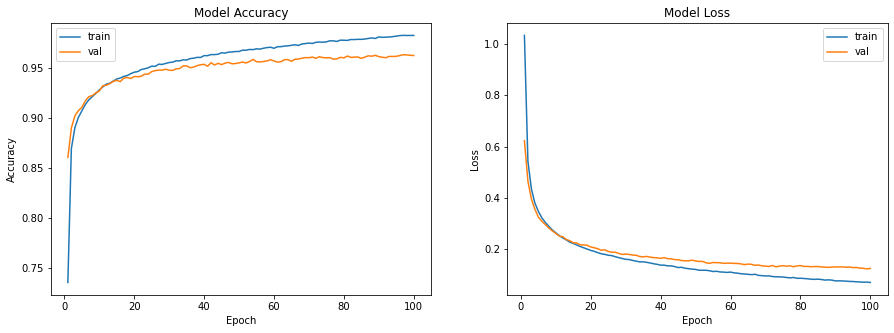

SGD Model took 72.36 seconds to train
SGD Accuracy on test data is: 96.23


In [13]:
# plot model history
plot_model_history(histo_info_sgd)
print("SGD Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_sgd))

In [22]:
from keras import optimizers
model_mom = simple_nn()
sgdmom = optimizers.SGD(lr=0.01,  momentum=0.9, nesterov=False)
model_mom.compile(optimizer=sgdmom, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
start = time.time()
histo_info_sgdmom = model_mom.fit(train_features, train_labels,  batch_size=128\
                       ,epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

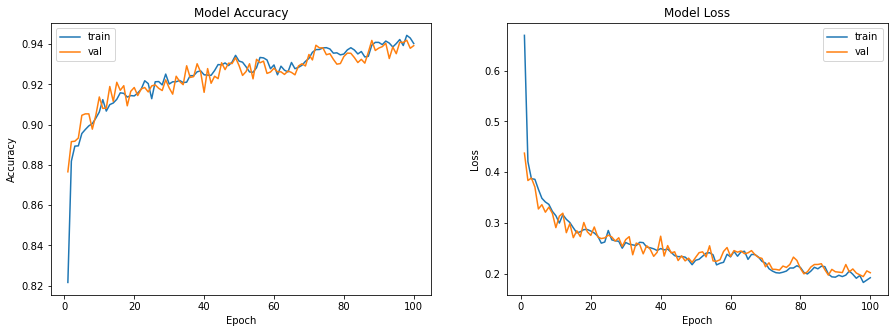

SGD Model took 73.78 seconds to train
SGD Accuracy on test data is: 93.93


In [47]:
# plot model history
plot_model_history(histo_info_sgdmom)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_mom))

RMSprop

In [66]:
model_rmsprop = simple_nn()
model_rmsprop.compile(optimizer="RMSprop", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_rmsprop = model_rmsprop.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

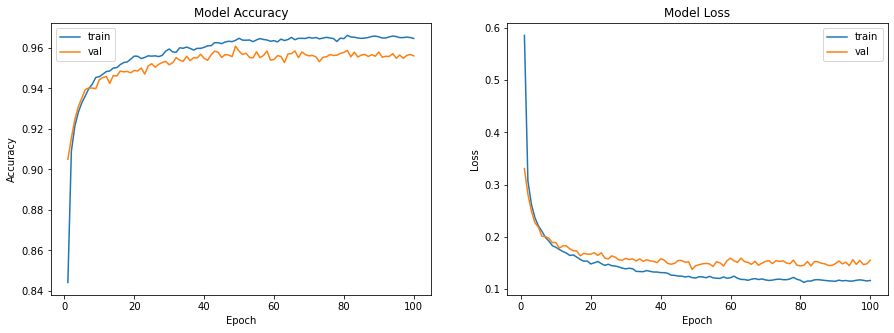

SGD Model took 97.85 seconds to train
SGD Accuracy on test data is: 95.61


In [67]:
# plot model history
plot_model_history(model_histo_rmsprop)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_rmsprop))

Adagrad

In [50]:
model_adagrad = simple_nn()
model_adagrad.compile(optimizer="Adagrad", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adagrad = model_adagrad.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

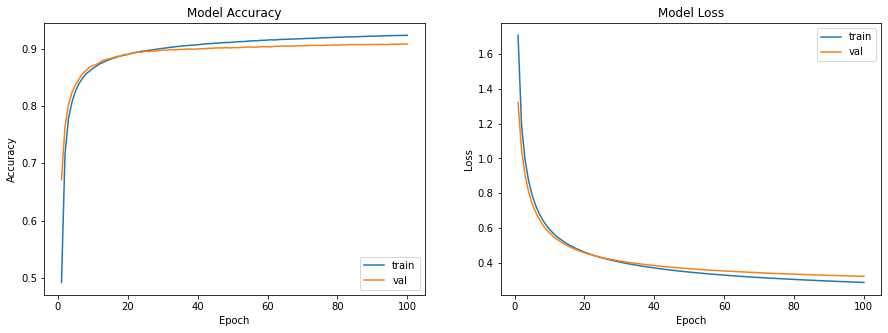

SGD Model took 79.98 seconds to train
SGD Accuracy on test data is: 90.79


In [51]:
# plot model history
plot_model_history(model_histo_adagrad)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adagrad))

Adadelta

In [58]:
model_adadelta = simple_nn()
model_adadelta.compile(optimizer="Adadelta", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adadelta = model_adadelta.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

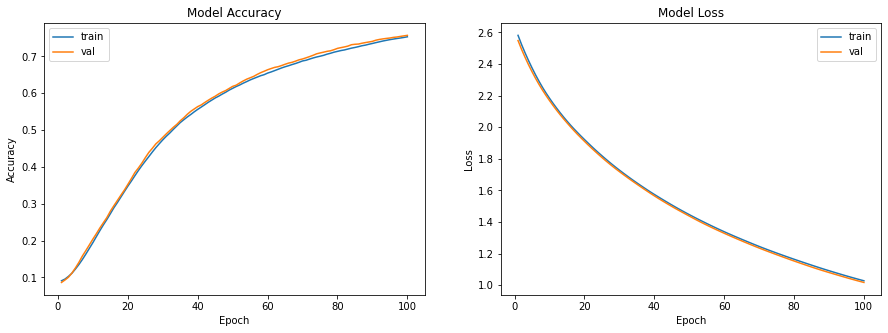

SGD Model took 83.40 seconds to train
SGD Accuracy on test data is: 75.71


In [59]:
# plot model history
plot_model_history(model_histo_adadelta)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adadelta))

Adam

In [60]:
model_adam = simple_nn()
model_adam.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adam = model_adam.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

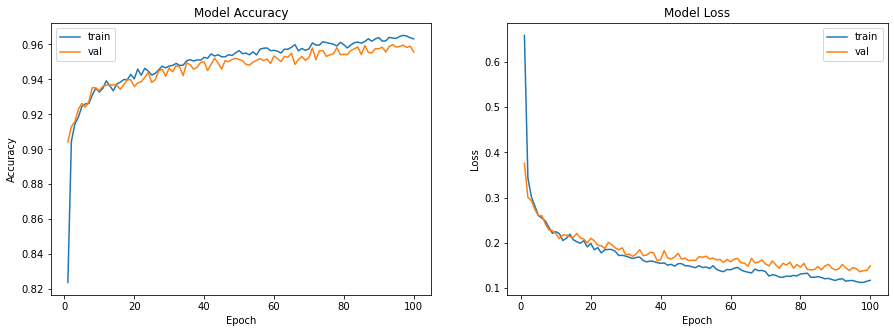

SGD Model took 78.29 seconds to train
SGD Accuracy on test data is: 95.57


In [61]:
# plot model history
plot_model_history(model_histo_adam)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adam))

Nadam

In [62]:
model_nadam = simple_nn()
model_nadam.compile(optimizer="Nadam", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_nadam = model_nadam.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

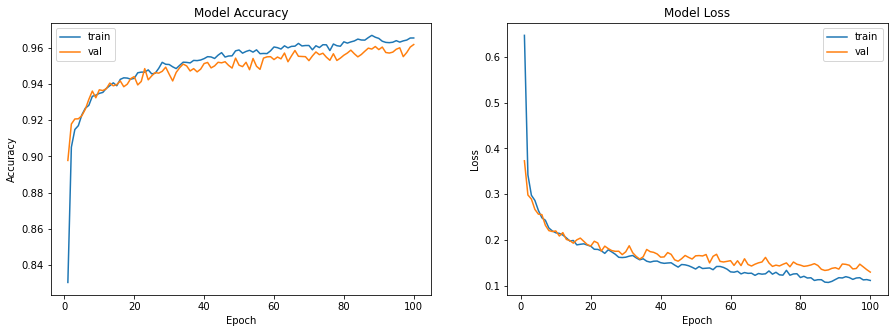

SGD Model took 99.02 seconds to train
SGD Accuracy on test data is: 96.18


In [63]:
# plot model history
plot_model_history(model_histo_nadam)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_nadam))

Adamax

In [64]:
model_adamax = simple_nn()
model_adamax.compile(optimizer="Adamax", loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adamax = model_adamax.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

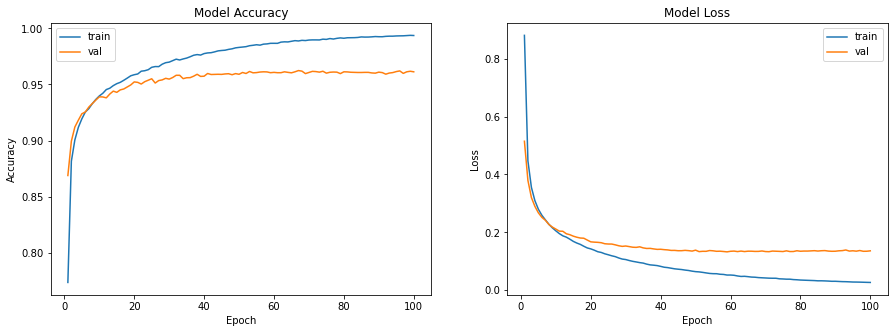

SGD Model took 79.19 seconds to train
SGD Accuracy on test data is: 96.13


In [65]:
# plot model history
plot_model_history(model_histo_adamax)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax))

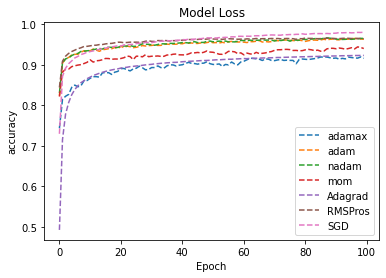

In [95]:
pyplot.plot(model_histo_adamax.history['accuracy'], linestyle = "--",label='adamax')
pyplot.plot(model_histo_adam.history['accuracy'], linestyle = "--",label='adam')
pyplot.plot(model_histo_nadam.history['accuracy'], linestyle = "--",label='nadam')
pyplot.plot(histo_info_sgdmom.history['accuracy'],linestyle = "--", label='mom')
pyplot.plot(model_histo_adagrad.history['accuracy'], linestyle = "--",label='Adagrad')
pyplot.plot(model_histo_rmsprop.history['accuracy'], linestyle = "--", label='RMSPros')
pyplot.plot(histo_info_sgd.history['accuracy'],linestyle = "--", label='SGD')

pyplot.title('Model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

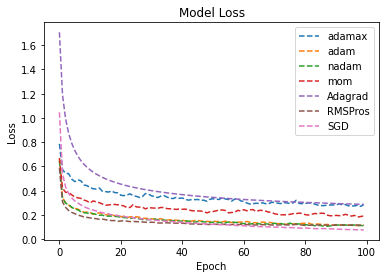

In [96]:
pyplot.plot(model_histo_adamax.history['loss'], linestyle = "--",label='adamax')
pyplot.plot(model_histo_adam.history['loss'], linestyle = "--",label='adam')
pyplot.plot(model_histo_nadam.history['loss'], linestyle = "--",label='nadam')
pyplot.plot(histo_info_sgdmom.history['loss'],linestyle = "--", label='mom')
pyplot.plot(model_histo_adagrad.history['loss'], linestyle = "--",label='Adagrad')
pyplot.plot(model_histo_rmsprop.history['loss'], linestyle = "--", label='RMSPros')
pyplot.plot(histo_info_sgd.history['loss'],linestyle = "--", label='SGD')

pyplot.title('Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()

In [83]:
adamax_lr1 = optimizers.Adamax(lr=0.1)
model_adamax_lr1 = simple_nn()
model_adamax_lr1.compile(optimizer=adamax_lr1, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adamax_lr1 = model_adamax_lr1.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

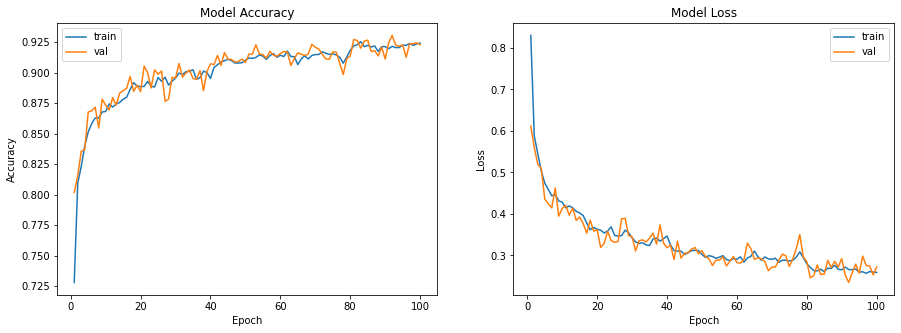

SGD Model took 80.09 seconds to train
SGD Accuracy on test data is: 92.30


In [84]:
# plot model history
plot_model_history(model_histo_adamax_lr1)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr1))

In [85]:
adamax_lr2 = optimizers.Adamax(lr=0.01)
model_adamax_lr2 = simple_nn()
model_adamax_lr2.compile(optimizer=adamax_lr2, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adamax_lr2 = model_adamax_lr2.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

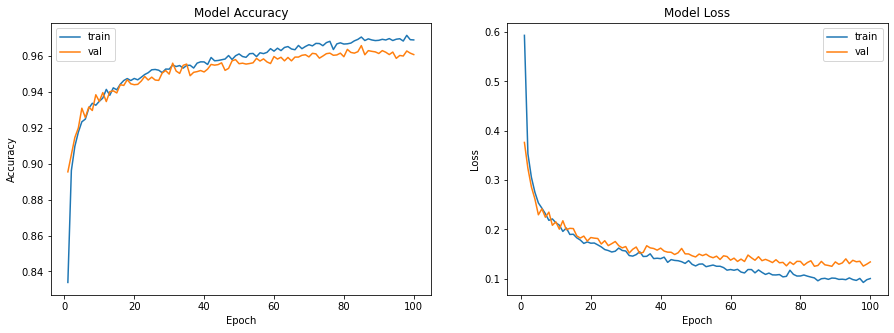

SGD Model took -10.72 seconds to train
SGD Accuracy on test data is: 96.09


In [87]:
# plot model history
plot_model_history(model_histo_adamax_lr2)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr2))

In [23]:
adamax_lr3 = optimizers.Adamax(lr=0.001)
model_adamax_lr3 = simple_nn()
model_adamax_lr3.compile(optimizer=adamax_lr3, loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
model_histo_adamax_lr3 = model_adamax_lr3.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_data=(test_features , test_labels))
end = time.time()

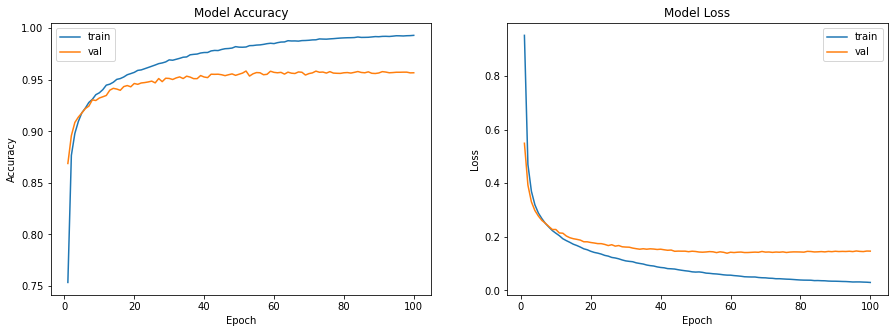

SGD Model took 79.33 seconds to train
SGD Accuracy on test data is: 95.68


In [89]:
# plot model history
plot_model_history(model_histo_adamax_lr3)
print("SGD Model took %0.2f seconds to train"%(end - start))
# test accuracy
print ("SGD Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_adamax_lr3))

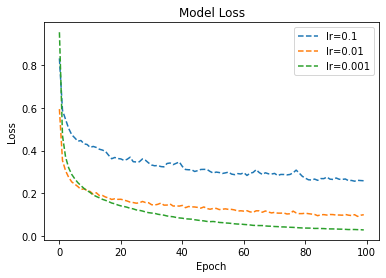

In [97]:
pyplot.plot(model_histo_adamax_lr1.history['loss'], linestyle = "--",label='lr=0.1')
pyplot.plot(model_histo_adamax_lr2.history['loss'], linestyle = "--", label='lr=0.01')
pyplot.plot(model_histo_adamax_lr3.history['loss'],linestyle = "--", label='lr=0.001')

pyplot.title('Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')

pyplot.legend()
pyplot.show()

In [25]:
pyplot.plot(model_histo_adamax_lr1.history['accuracy'], linestyle = "--",label='lr=0.1')
pyplot.plot(model_histo_adamax_lr2.history['accuracy'], linestyle = "--", label='lr=0.01')
pyplot.plot(model_histo_adamax_lr3.history['accuracy'],linestyle = "--", label='lr=0.001')

pyplot.title('accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('Epoch')

pyplot.legend()
pyplot.show()

NameError: name 'model_histo_adamax_lr1' is not defined

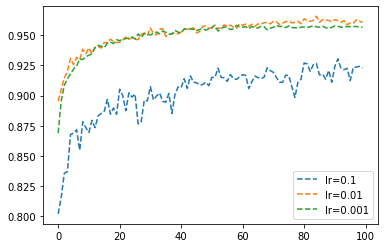

In [92]:
pyplot.plot(model_histo_adamax_lr1.history['val_accuracy'], linestyle = "--",label='lr=0.1')
pyplot.plot(model_histo_adamax_lr2.history['val_accuracy'], linestyle = "--", label='lr=0.01')
pyplot.plot(model_histo_adamax_lr3.history['val_accuracy'],linestyle = "--", label='lr=0.001')


pyplot.legend()
pyplot.show()

In [98]:
from keras.utils import plot_model
plot_model(model_adamax_lr3, to_file='model.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


conda install pydot<br/>
conda install pydotplus

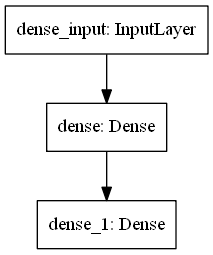

In [14]:
from keras.utils import plot_model
plot_model(model_sgd, to_file='model.png')

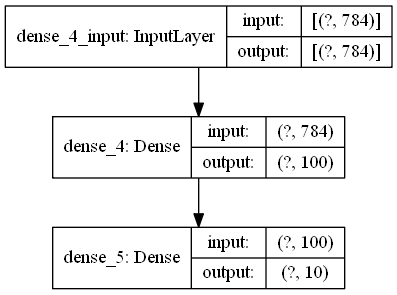

In [24]:
plot_model(model_adamax_lr3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)